In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
N = 2 # mini-batch size
H = 3 # vector dim in hidden state
T = 20 # length of time-series data

dh = np.ones((N, H))
np.random.seed(3)
Wh = np.random.randn(H, H)

norm_list = []
for t in range(T):
    dh = np.matmul(dh, Wh.T)
    norm = np.sqrt(np.sum(dh**2)) / N
    norm_list.append(norm)

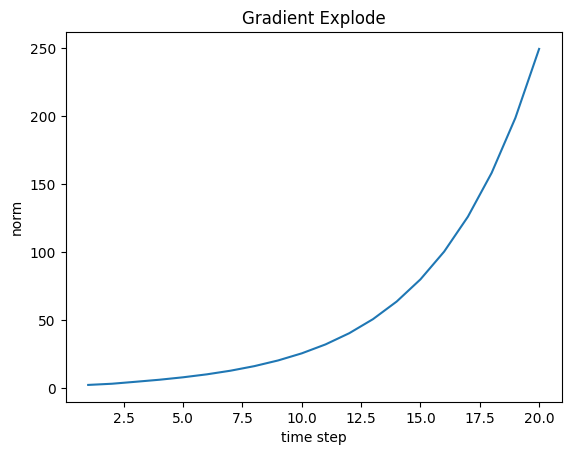

In [18]:
T = np.arange(1, 21)

plt.plot(T, norm_list)
plt.title("Gradient Explode")
plt.xlabel("time step")
plt.ylabel("norm");

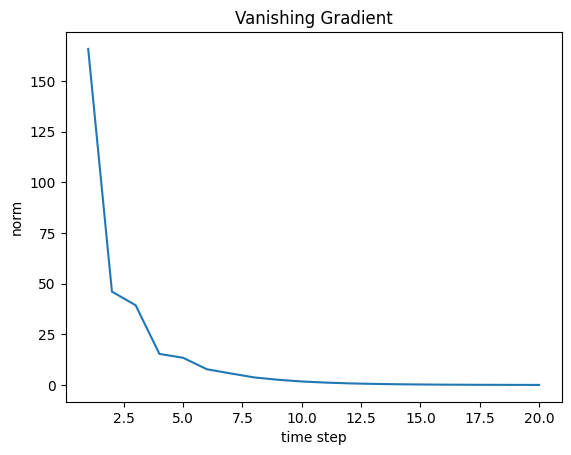

In [19]:
T = 20
Wh = np.random.randn(H, H) * 0.5

norm_list = []
for t in range(T):
    dh = np.matmul(dh, Wh.T)
    norm = np.sqrt(np.sum(dh**2)) / N
    norm_list.append(norm)

T = np.arange(1, 21)
plt.plot(T, norm_list)
plt.title("Vanishing Gradient")
plt.xlabel("time step")
plt.ylabel("norm");

In [20]:
# How to fix this
# Use Gradient Clipping
dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0 # theshold

def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad**2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate